In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPool2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense

In [3]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

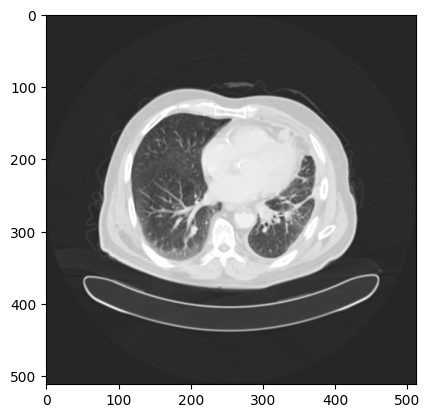

In [5]:
# plt.imshow(image_B)
plt.imshow(image_M)


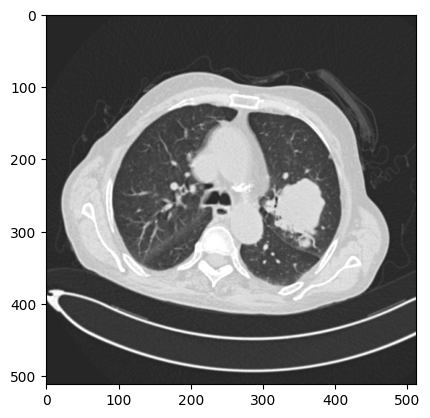

In [6]:
plt.imshow(image_2)
plt.imshow(image_3)